In [168]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [91]:
employee_dataset = pd.read_csv("IBM Attrition Data.csv")[['Age','Attrition', 'Department', 'DistanceFromHome','Education', 'EducationField', 'EnvironmentSatisfaction','JobSatisfaction','MaritalStatus','MonthlyIncome' ,'NumCompaniesWorked','WorkLifeBalance', 'YearsAtCompany']]

In [92]:
employee_dataset.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


<function matplotlib.pyplot.show(*args, **kw)>

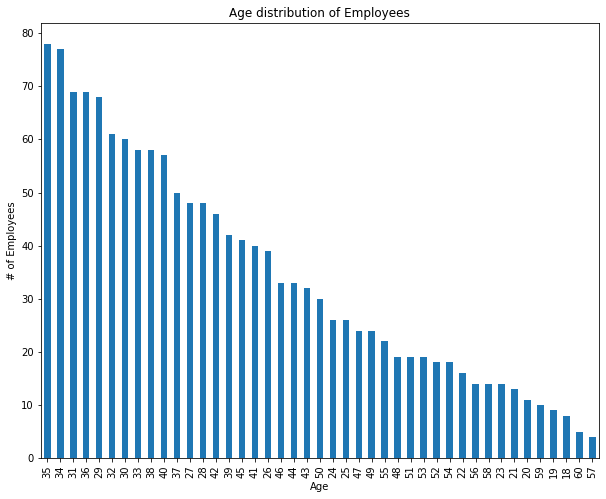

In [201]:
#mean
employee_dataset.Age.mean()

#median

employee_dataset.Age.median()

#age distribution in IBM
plt.figure(figsize=(10,8))
employee_dataset.Age.value_counts().plot(kind='bar')
plt.title("Age distribution of Employees")
plt.xlabel("Age")
plt.ylabel("# of Employees")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

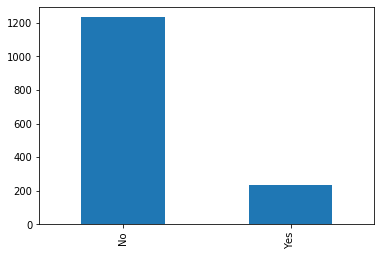

In [204]:
#attrition by age
employee_dataset.Attrition.value_counts().plot(kind= 'bar')
plt.show

In [123]:
emp_attr = employee_dataset.groupby("Attrition")
emp_attr


In [124]:
#attrited employee data
attr_emp = emp_attr.get_group("Yes")
attr_emp

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
14,28,Yes,Research & Development,24,3,Life Sciences,3,3,Single,2028,5,3,4
21,36,Yes,Sales,9,4,Life Sciences,3,1,Single,3407,7,3,5
24,34,Yes,Research & Development,6,1,Medical,2,1,Single,2960,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Sales,9,3,Marketing,4,1,Married,1790,1,2,1
1442,29,Yes,Research & Development,1,4,Medical,1,4,Married,4787,9,4,2
1444,56,Yes,Research & Development,7,2,Technical Degree,4,3,Married,2339,8,1,10
1452,50,Yes,Sales,1,4,Life Sciences,2,3,Divorced,6728,7,3,6


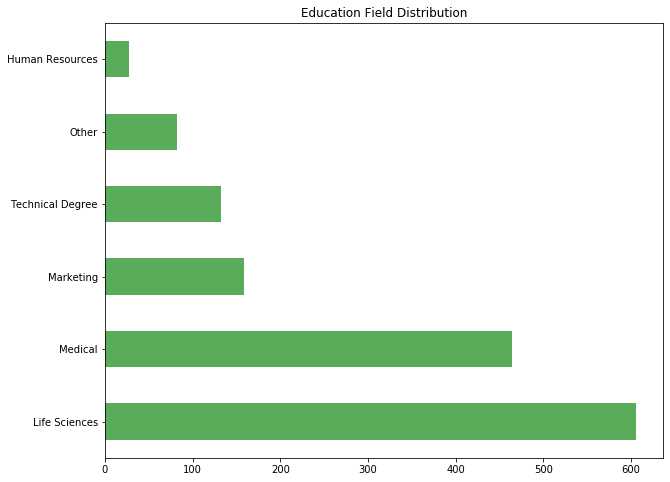

In [193]:
# employees distribution by educational fields 
plt.figure(figsize=(10,8))
employee_dataset.EducationField.value_counts().plot(kind='barh',color='g',alpha=.65)
plt.title("Education Field Distribution")
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

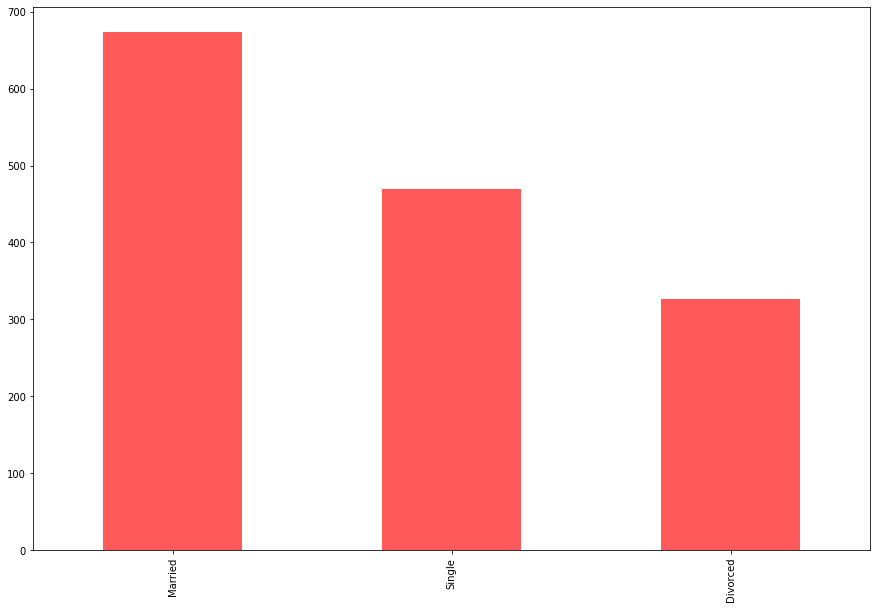

In [196]:
#bar chart for married and unamrried employees

plt.figure(figsize=(15,10))
employee_dataset.MaritalStatus.value_counts().plot(kind='bar', color= 'r', alpha= .65)
plt.show


In [205]:
employee_dataset.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [209]:
#logistic regressison for predicitng the employee attrition

LogReg = LogisticRegression()
employee_dataset['Attrition'].replace('Yes',1, inplace=True)
employee_dataset['Attrition'].replace('No',0, inplace=True)
employee_dataset.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,0,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,1,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,0,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,0,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
